<a href="https://colab.research.google.com/github/Ellen-Tuane/camera_calibration/blob/main/Camera_calibration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Camera Calibration and Distortion

Calibration pattern: When we have complete control over the imaging process, the best way to perform calibration is to capture several images of an object or pattern of known dimensions from different view points. The checkerboard based method that we will learn in this post belongs to this category. We can also use circular patterns of known dimensions instead of checker board pattern.

1 . Enable GPU on notbool settings: Edit > Notebook Settings > on hardware aceleration chosse GPU and save it.

In [ ]:
!pip install opencv-contrib-python==3.4.13.47 --force-reinstall

2 . Amount Google Drive to import **images**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

3 . Copy images from drive into images folder on colab

In [ ]:
!cp -a /content/drive/MyDrive/yolov4/Calibration/.   /content/images/

4 . Move into images folder

In [ ]:
%cd /content/images/ellen_cam

5 .  Set directory where images output will be saved

In [ ]:
path = '/content/images/ellen_cam'
save_path = '/content/drive/MyDrive/yolov4/calibration_output/'

6 . Import Labraries

In [ ]:
# Import required modules
import cv2
import numpy as np
import os
import glob

7 . Set chessboard dimentions

In [ ]:
# Define the dimensions of checkerboard
CHECKERBOARD = (9, 6)

8 . Set image type

In [ ]:
# Extracting path of individual image stored in a given directory. Since no path is
# specified, it will take current directory images files alone

images = glob.glob('*.HEIC') # set image type (.png, .jpg, .jpeg, .HEIC, ...)

print(len(images))

9 . Find chess board corners

In [ ]:
# stop the iteration when specified accuracy, epsilon, is reached or
# specified number of iterations are completed.
criteria = (cv2.TERM_CRITERIA_EPS +
            cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)


# Vector for 3D points
threedpoints = []

# Vector for 2D points
twodpoints = []


# 3D points real world coordinates
objectp3d = np.zeros((1, CHECKERBOARD[0]
                    * CHECKERBOARD[1],
                    3), np.float32)
objectp3d[0, :, :2] = np.mgrid[0:CHECKERBOARD[0],
                            0:CHECKERBOARD[1]].T.reshape(-1, 2)
prev_img_shape = None
count = 0

if os.path.exists(path):
    for img in images:
        img_path = os.path.join(path, img)
        image = cv2.imread(img_path)
        grayColor = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Find the chess board corners
        # If desired number of corners are
        # found in the image then ret = true
        ret, corners = cv2.findChessboardCorners(grayColor, CHECKERBOARD, cv2.CALIB_CB_ADAPTIVE_THRESH + cv2.CALIB_CB_FAST_CHECK + cv2.CALIB_CB_NORMALIZE_IMAGE)

        
        # If desired number of corners can be detected then,
        # refine the pixel coordinates and display
        # them on the images of checker board
        if ret:
            threedpoints.append(objectp3d)

            # Refining pixel coordinates
            # for given 2d points.
            corners2 = cv2.cornerSubPix(grayColor, corners, (11, 11), (-1, -1), criteria)

            twodpoints.append(corners2)

            # Draw and display the corners
            image = cv2.drawChessboardCorners(image, CHECKERBOARD, corners2, ret)
            cv2.imwrite(f"{save_path}/{img}.jpg", image)
            # print(filename)
            count += 1
                
        else:
            pass
            # If for any reason cv can't find the chess board corners on an especific image, it will return the image name
            print('error: ', img)

print('images considered in calibration', count)

10 . Performe Calibration

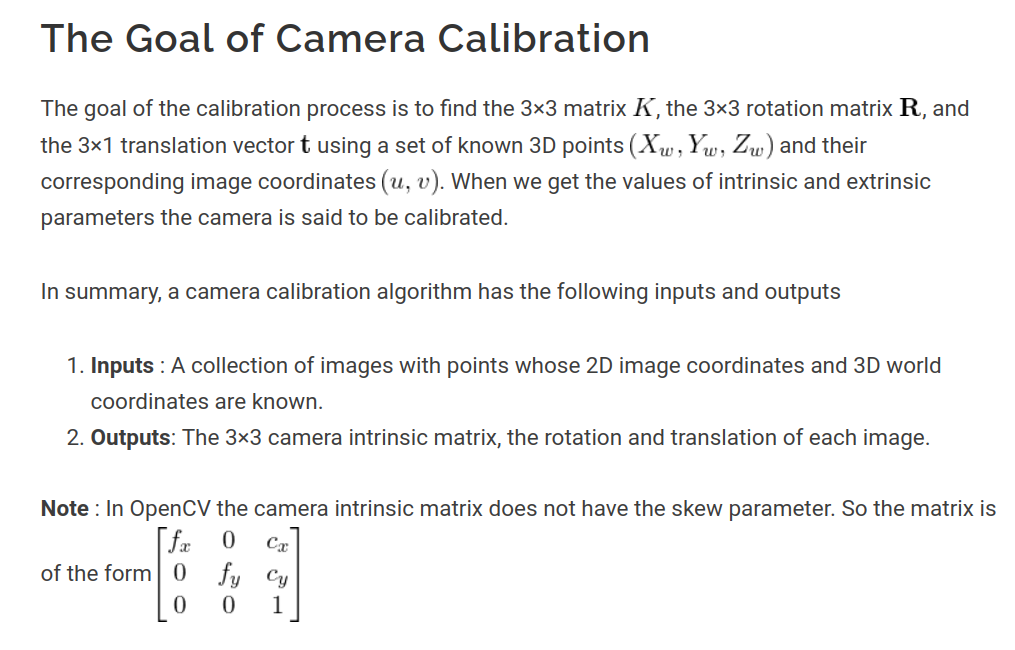

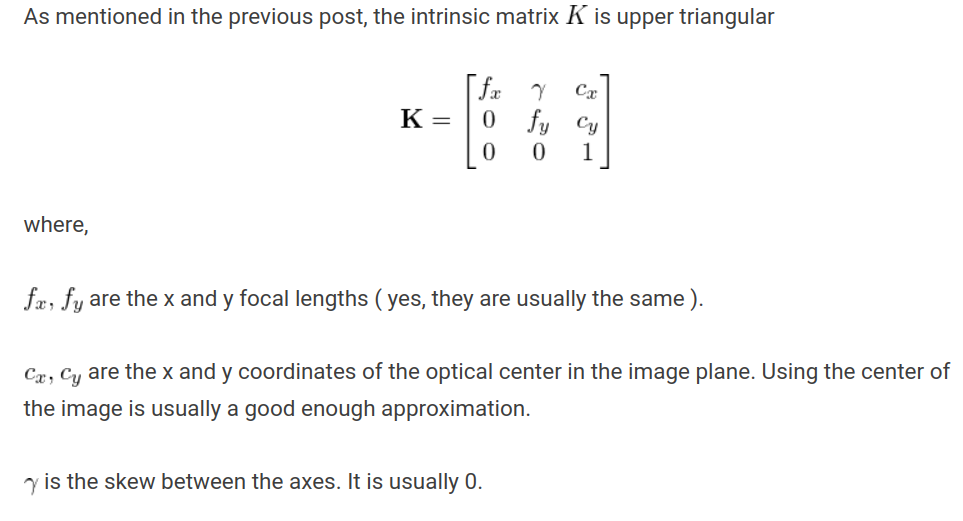

In [ ]:
# Perform camera calibration by
# passing the value of above found out 3D points (threedpoints)
# and its corresponding pixel coordinates of the
# detected corners (twodpoints)
ret, matrix, distortion, r_vecs, t_vecs = cv2.calibrateCamera(threedpoints, twodpoints, grayColor.shape[::-1], None, None)

# Displaying required output
print(" Camera matrix:") #in pixels
print(matrix)

print("\n Distortion coefficient:")
print(distortion)

print("\n Rotation Vectors:")
print(r_vecs)

print("\n Translation Vectors:")
print(t_vecs)

In [ ]:
#move to the parameters save_path 
%cd /content/drive/MyDrive/yolov4/Calibration/calibration_output

In [ ]:
# Save parameters
np.save('ret.npy', ret)
np.save('matrix.npy', matrix)
np.save('distortion.npy', distortion)
np.save('r_vecs.npy', r_vecs)
np.save('t_vecs.npy', t_vecs)

11. Re-projection Error

In [ ]:
# Re-projection error gives a good estimation of just how exact the found parameters are.
# The closer the re-projection error is to zero, the more accurate the parameters we found are.
mean_error = 0
for i in range(len(objectp3d)):
    imgpoints, _ = cv2.projectPoints(objectp3d[i], r_vecs[i], t_vecs[i], matrix, distortion)
    error = cv2.norm(objectp3d[i], imgpoints, cv2.NORM_L2)/len(imgpoints)
    mean_error += error

total_error = mean_error/len(objectp3d)
np.save('total_error.npy', total_error)
print( "total error: {}".format(mean_error/len(objectp3d)))

References:

[1]Camera calibration With OpenCV. Available at: https://docs.opencv.org/4.x/d4/d94/tutorial_camera_calibration.html. Accessed on: 14 Abr, 2022.

[2]Camera calibration with square chessboard. Available at:https://docs.opencv.org/4.x/dc/d43/tutorial_camera_calibration_square_chess.html.  Accessed on: 14 Abr, 2022.

[3] A comprehensive guide for Camera calibration in computer vision. Analytics Vidhya, 2021. Available at:https://www.analyticsvidhya.com/blog/2021/10/a-comprehensive-guide-for-camera-calibration-in-computer-vision/. Accessed on: 14 Abr, 2022.

[4] Camera Calibration with Python – OpenCV. Geeks for Geeks, 2021. Available at: https://www.geeksforgeeks.org/camera-calibration-with-python-opencv/. Accessed on: 14 Abr, 2022.

[5] Camera Calibration using OpenCV. Learn Opencv, 2020. Available at: https://learnopencv.com/camera-calibration-using-opencv/. Accessed on: 14 Abr, 2022.